In [2]:
# Import libraries
import pandas as pd
import pyreadstat as pyr

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
# 4th analysis
#load df
df, meta = pyr.read_sav('afrobarometer_nigeria_rd8_2021.sav')
# Select specific columns from the Dataframe based on the information provided in the metadata
# and Replaces the code numbers with the actual values in each column using their actual name in the metadata
columns = ['REGION','Q9', 'Q10A', 'Q10B', 'Q10C']
df_new = df.copy()[columns]
for i in columns:
    x = meta.variable_value_labels[i]
    df_new[i].replace(x, inplace=True)
    


# Rename columns
df_new.columns = ['State', 'Discuss politics', 'Free to say what you think', 'Free to join political organization', 'Free to chose who to vote for']

df_new.head()

,State,Discuss politics,Free to say what you think,Free to join political organization,Free to chose who to vote for
0,IMO,Occasionally,Not at all free,Not at all free,Somewhat free
1,FCT ABUJA,Frequently,Not very free,Completely free,Not very free
2,FCT ABUJA,Occasionally,Not at all free,Not at all free,Not at all free
3,FCT ABUJA,Never,Not at all free,Not at all free,Not at all free
4,FCT ABUJA,Occasionally,Somewhat free,Completely free,Completely free


In [19]:
df_new['Discuss politics'].value_counts()

Occasionally    792
Frequently      418
Never           327
Name: Discuss politics, dtype: int64

In [18]:
hope = ["Don't know"]
less = ['Discuss politics', 'Free to join political organization']

for j in less:
    df_new = df_new.loc[df_new[j] != "Refused"]

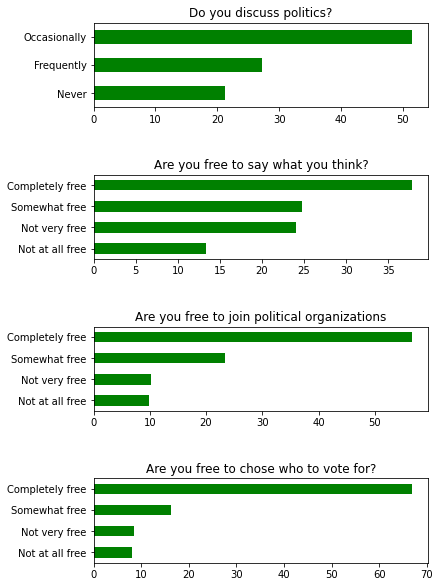

In [24]:
fig = plt.figure()

# Needed to add spacing between 1st and 2nd row
# Add a margin between the main title and sub-plots
fig.subplots_adjust(hspace=0.8, top=2)

# Add the main title
# fig.suptitle("Main Title", fontsize=15)

# Add the subplots
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

# Plot for axis 1-4
(df_new['Discuss politics'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax1, color='green')
(df_new['Free to say what you think'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax2, color='green')
(df_new['Free to join political organization'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax3, color='green')
(df_new['Free to chose who to vote for'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax4, color='green')

# Add the text for each subplot
ax1.title.set_text("Do you discuss politics?")
ax2.title.set_text("Are you free to say what you think?")
ax3.title.set_text("Are you free to join political organizations")
ax4.title.set_text("Are you free to chose who to vote for?")
plt.show()

In [28]:
df_new['Free to chose who to vote for'].value_counts(normalize=True).sort_values()*100

Not at all free     8.132726
Not very free       8.588159
Somewhat free      16.330514
Completely free    66.948601
Name: Free to chose who to vote for, dtype: float64